<a href="https://colab.research.google.com/github/thuongh2/FinalProject/blob/main/EDA_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dữ liệu lúa

In [47]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [48]:
BASE_URL = "https://s3-hcm-r1.longvan.net/machine-learning"

In [49]:
URL_RICE = BASE_URL + '/Gao.xlsx'

In [50]:
df_rice = pd.read_excel(URL_RICE)
df_rice.head()

,Tên_mặt_hàng,Thị_trường,Ngày,Giá
0,Gạo thường|Rice,An Giang,2007-03-08,4800
1,Gạo thường|Rice,An Giang,2007-03-09,4900
2,Gạo thường|Rice,An Giang,2007-03-12,4900
3,Gạo thường|Rice,An Giang,2007-03-13,4900
4,Gạo thường|Rice,An Giang,2007-03-14,4900


In [51]:
df_rice = df_rice[df_rice['Thị_trường'] == 'An Giang']

In [52]:
df = pd.DataFrame()
df['date'] = df_rice['Ngày']
df['price'] = df_rice['Giá']
df.head()

,date,price
0,2007-03-08,4800
1,2007-03-09,4900
2,2007-03-12,4900
3,2007-03-13,4900
4,2007-03-14,4900


In [53]:
z = np.abs(stats.zscore(df['price']))
threshold = 3
outliers = df[z > threshold]
print(outliers)

           date  price
1043 2012-10-08   1050
2496 2021-06-30   1200
2980 2023-12-04  18500
2981 2023-12-06  18500
2982 2023-12-07  18500
2984 2023-12-13  18000
2985 2023-12-18  17500
2986 2023-12-20  17000
2987 2023-12-22  17000


In [54]:
df = df.drop(outliers.index)

<Axes: xlabel='date', ylabel='price'>

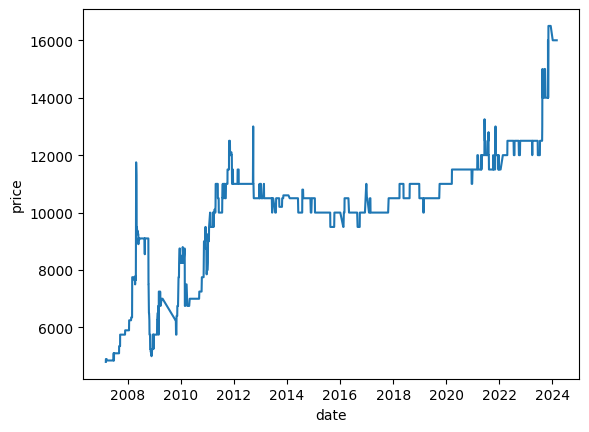

In [55]:
sns.lineplot(x='date', y='price', data=df)

In [56]:
df_weather = pd.read_csv("https://s3-hcm-r1.longvan.net/machine-learning/weather_data.csv")
df_weather.head()

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2007-01-01,80.2,75.2,89.2,0.0,14.0,3.7,1011.0
1,2007-01-02,81.7,75.2,89.6,0.0,14.0,4.8,1011.0
2,2007-01-03,80.8,75.2,90.1,0.0,14.0,6.6,1011.0
3,2007-01-04,82.4,75.9,91.0,0.0,14.0,4.0,1011.0
4,2007-01-05,80.4,77.0,87.1,0.0,14.0,4.0,1011.0


In [57]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius

    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [58]:
# Định dạng ngày
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [59]:
df_weather["tmin"] = fahr_to_celsius(df_weather["tmin"])
df_weather["tavg"] = fahr_to_celsius(df_weather["tavg"])
df_weather["tmax"] = fahr_to_celsius(df_weather["tmax"])

In [60]:
df = pd.merge(left=df, right=df_weather, on='date')
df.head()

df.to_csv("./data.csv")

In [93]:
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
df.to_csv("./data.csv")

In [90]:
df.head()

,date,price,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2007-03-08,4800,28.277778,25.388889,34.722222,0.831,114.0,7.6,1011.0
1,2007-03-09,4900,28.277778,25.388889,34.722222,0.831,114.0,7.6,1011.0
2,2007-03-12,4900,30.000000,25.000000,37.000000,0.831,112.0,10.6,1011.0
3,2007-03-13,4900,28.777778,26.000000,35.611111,0.831,127.0,10.6,1011.0
4,2007-03-14,4900,28.000000,25.000000,34.000000,0.831,137.0,9.7,1011.0


In [62]:
corr = df.corr(method = 'pearson')
corr

<ipython-input-62-cbb2787d0da5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


,price,tavg,tmin,tmax,prcp,wdir,wspd,pres
price,1.000000,0.248017,0.270029,0.015563,-0.262740,0.001873,0.001940,-0.256046
tavg,0.248017,1.000000,0.771280,0.769908,-0.151584,-0.001743,0.291734,-0.194343
tmin,0.270029,0.771280,1.000000,0.473825,-0.158987,0.129682,0.335567,-0.301450
tmax,0.015563,0.769908,0.473825,1.000000,-0.022663,-0.086281,0.207468,0.041035
prcp,-0.262740,-0.151584,-0.158987,-0.022663,1.000000,-0.037412,-0.058304,0.098394
wdir,0.001873,-0.001743,0.129682,-0.086281,-0.037412,1.000000,0.073809,-0.231128
wspd,0.001940,0.291734,0.335567,0.207468,-0.058304,0.073809,1.000000,-0.110999
pres,-0.256046,-0.194343,-0.301450,0.041035,0.098394,-0.231128,-0.110999,1.000000


In [63]:
c = np.corrcoef(df['price'],df['tmin'])
print('Correlations\n',c)

Correlations
 [[1.         0.27002893]
 [0.27002893 1.        ]]


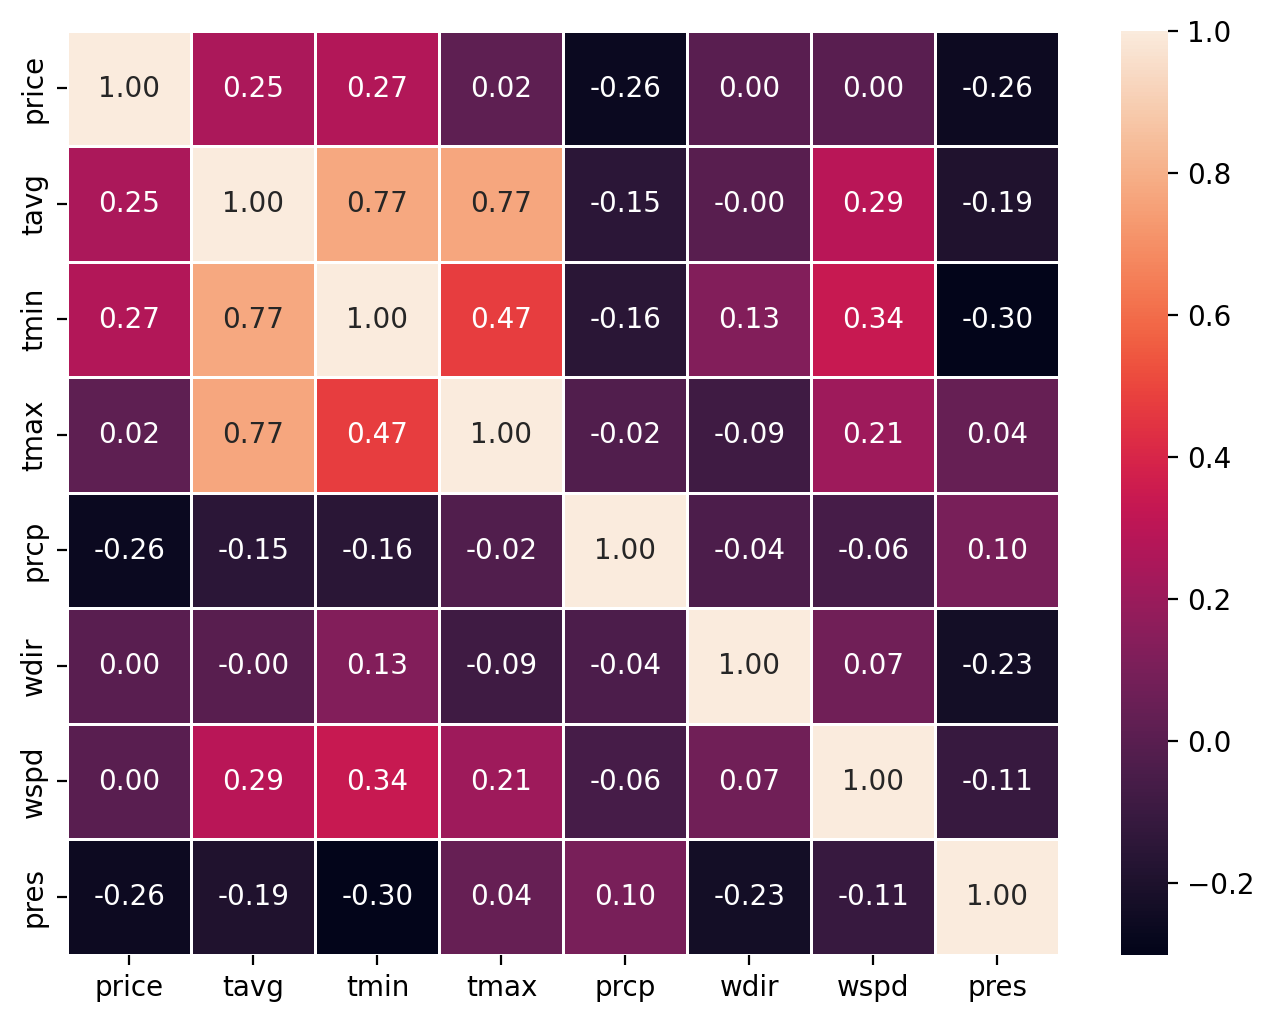

In [64]:
plt.figure(figsize=(8,6), dpi =200)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [65]:
df_he_thu = pd.read_excel("https://s3-hcm-r1.longvan.net/machine-learning/xnk_he_thu.xlsx")
df_he_thu.head()

,Loại,Tên,Năm,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
0,Tỉnh,An Giang,2023,228.926,59.19,1354.47
1,Tỉnh,An Giang,2022,371.000,60.50,2242.80
2,Tỉnh,An Giang,2021,390.000,60.30,2350.80
3,Tỉnh,An Giang,2020,403.000,58.30,2348.60
4,Tỉnh,An Giang,2019,387.800,57.80,2241.00


In [66]:
df_he_thu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loại                   14 non-null     object 
 1   Tên                    14 non-null     object 
 2   Năm                    14 non-null     int64  
 3   Diện tích (nghìn ha)   14 non-null     float64
 4   Năng suất (tạ/ha)      14 non-null     float64
 5   Sản lượng (nghìn tấn)  14 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 800.0+ bytes


In [67]:
df_thu_dong = pd.read_excel("https://s3-hcm-r1.longvan.net/machine-learning/xnk_thu_dong.xlsx")
df_thu_dong.head()

,Loại,Tên,Năm,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
0,Tỉnh,An Giang,2023,227.547,73.0,1655.15
1,Tỉnh,An Giang,2022,229.800,73.4,1685.90
2,Tỉnh,An Giang,2021,230.400,76.9,1771.80
3,Tỉnh,An Giang,2020,229.400,71.7,1645.10
4,Tỉnh,An Giang,2019,233.700,71.0,1659.30


In [68]:
df['date'][0].year

2007

In [69]:
value = df_he_thu['Diện tích (nghìn ha)'][df_he_thu['Năm'] == df['date'][0].year]
if not value.empty:
  value = value.values[0]
print(value)

Series([], Name: Diện tích (nghìn ha), dtype: float64)


In [70]:
df_he_thu.head()

,Loại,Tên,Năm,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
0,Tỉnh,An Giang,2023,228.926,59.19,1354.47
1,Tỉnh,An Giang,2022,371.000,60.50,2242.80
2,Tỉnh,An Giang,2021,390.000,60.30,2350.80
3,Tỉnh,An Giang,2020,403.000,58.30,2348.60
4,Tỉnh,An Giang,2019,387.800,57.80,2241.00


In [71]:
df.head()

,date,price,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2007-03-08,4800,28.277778,25.388889,34.722222,0.831,114.0,7.6,1011.0
1,2007-03-09,4900,28.277778,25.388889,34.722222,0.831,114.0,7.6,1011.0
2,2007-03-12,4900,30.000000,25.000000,37.000000,0.831,112.0,10.6,1011.0
3,2007-03-13,4900,28.777778,26.000000,35.611111,0.831,127.0,10.6,1011.0
4,2007-03-14,4900,28.000000,25.000000,34.000000,0.831,137.0,9.7,1011.0


In [72]:
df_thu_dong['Sản lượng (nghìn tấn)'] = pd.to_numeric(df_thu_dong['Sản lượng (nghìn tấn)'], errors='coerce')

In [73]:
df_thu_dong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loại                   14 non-null     object 
 1   Tên                    14 non-null     object 
 2   Năm                    14 non-null     int64  
 3   Diện tích (nghìn ha)   14 non-null     float64
 4   Năng suất (tạ/ha)      14 non-null     float64
 5   Sản lượng (nghìn tấn)  14 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 800.0+ bytes


In [74]:
df_thu_dong.head()

,Loại,Tên,Năm,Diện tích (nghìn ha),Năng suất (tạ/ha),Sản lượng (nghìn tấn)
0,Tỉnh,An Giang,2023,227.547,73.0,1655.15
1,Tỉnh,An Giang,2022,229.800,73.4,1685.90
2,Tỉnh,An Giang,2021,230.400,76.9,1771.80
3,Tỉnh,An Giang,2020,229.400,71.7,1645.10
4,Tỉnh,An Giang,2019,233.700,71.0,1659.30


- Hè thu 4 - 9 thu đông 10 - 3

In [75]:
df_predict = df[['price', 'tmin']]
df_predict.head()

,price,tmin
0,4800,25.388889
1,4900,25.388889
2,4900,25.000000
3,4900,26.000000
4,4900,25.000000


In [76]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2995 entries, 0 to 2994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2995 non-null   int64  
 1   tmin    2995 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 134.7 KB


In [77]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [78]:
adf_test(df_predict['price'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.614617
p-value                    0.475553
# lags used                2.000000
# observations          2992.000000
critical value (1%)       -3.432537
critical value (5%)       -2.862506
critical value (10%)      -2.567284
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [79]:
adf_test(df_predict['tmin'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.620194e+00
p-value                 6.064288e-09
# lags used             1.500000e+01
# observations          2.979000e+03
critical value (1%)    -3.432547e+00
critical value (5%)    -2.862511e+00
critical value (10%)   -2.567287e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [80]:
df_difference = df_predict.diff()

In [81]:
adf_test(df_difference['price'])
adf_test(df_difference['tmin'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -47.850993
p-value                    0.000000
# lags used                1.000000
# observations          2992.000000
critical value (1%)       -3.432537
critical value (5%)       -2.862506
critical value (10%)      -2.567284
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic       -22.267428
p-value                    0.000000
# lags used               11.000000
# observations          2982.000000
critical value (1%)       -3.432545
critical value (5%)       -2.862510
critical value (10%)      -2.567286
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [82]:
df_difference.size *0.3

1797.0

In [83]:
df_difference = df_difference.dropna()

In [84]:
from statsmodels.tsa.api import VAR

In [85]:
test_obs = int(df_difference.size * 0.3)
train = df_difference[:test_obs]
test = df_difference[test_obs:]

In [86]:
train

,price,tmin
1,100.0,0.000000
2,0.0,-0.388889
3,0.0,1.000000
4,0.0,-1.000000
5,0.0,-4.722222
...,...,...
1792,0.0,0.000000
1793,0.0,-1.000000
1794,0.0,1.000000
1795,0.0,1.000000


In [87]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  10.763653833426972
BIC:  10.782014034989942

Order = 2
AIC:  10.708234250089204
BIC:  10.738848536837356

Order = 3
AIC:  10.694354343386335
BIC:  10.73723389532748



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Order = 4
AIC:  10.663837770751766
BIC:  10.718993784526111

Order = 5
AIC:  10.646779228002028
BIC:  10.714222916916231

Order = 6
AIC:  10.646167653319608
BIC:  10.725910247380897

Order = 7
AIC:  10.644874919538099
BIC:  10.736927665488498

Order = 8
AIC:  10.640366808202826
BIC:  10.744740969553462

Order = 9
AIC:  10.6398871035907
BIC:  10.756593960656206

Order = 10
AIC:  10.642044662177524
BIC:  10.77109551211052



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [88]:
result = model.fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Mar, 2024
Time:                     13:06:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    10.7142
Nobs:                     1791.00    HQIC:                   10.6717
Log likelihood:          -14594.8    FPE:                    42056.9
AIC:                      10.6468    Det(Omega_mle):         41545.0
--------------------------------------------------------------------
Results for equation price
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            3.584607         4.547788            0.788           0.431
L1.price        -0.100615         0.023692           -4.247           0.000
L1.tmin        -12.789383         4.256385           -3.005           0.003
L2.p

In [89]:
lagged_Values = train.values[-8:]
pred = result.forecast(y=lagged_Values, steps=12)

idx = pd.date_range('2015-01-01', periods=12, freq='MS')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=['money_2d', 'spending_2d'])